# <center>Data Exploration (NSL-KDD)</center>

In [2]:
import numpy as np
import pandas as pd

import preprocessing
import cgan
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

import pandas_profiling
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [2]:
train,test, label_mapping = preprocessing.get_data(encoding="Label")
data_cols = list(train.columns[ train.columns != 'label' ])
train = preprocessing.normalize_data(train,data_cols)
test = preprocessing.normalize_data(test,data_cols)
x_train , x_test = preprocessing.preprocess(train,test,data_cols,"Robust",True)
# x_train = preprocessing.remove_outliers(train)

# train, test = None, None
y_train = x_train.label.values
y_test = x_test.label.values

In [3]:
data_cols = list(x_train.columns[ x_train.columns != 'label' ])

to_drop = preprocessing.get_contant_featues(x_train,data_cols,threshold=0.995)
x_train.drop(to_drop, axis=1,inplace=True)
x_test.drop(to_drop, axis=1,inplace=True)

data_cols = list(x_train.columns[ x_train.columns != 'label' ])
print("Total data features : {}".format(len(data_cols)))

Total data features : 25


In [5]:
train.head()

duration  protocol_type   service      flag  src_bytes  dst_bytes  \
0       0.0      -0.005426 -0.010681 -0.004034   0.902520   0.000000   
1       0.0       0.027664 -0.004616  0.002431   0.443658   0.000000   
2       0.0       0.005282  0.000069  0.018581  -0.052693   0.000000   
3       0.0      -0.017853 -0.012499 -0.012138  -0.024263   0.999103   
4       0.0      -0.007132 -0.004639 -0.005147   0.284645   0.711973   

   wrong_fragment  hot  logged_in  num_compromised  ...  dst_host_count  \
0             0.0  0.0   0.000000              0.0  ...       -0.149771   
1             0.0  0.0   0.000000              0.0  ...        0.425462   
2             0.0  0.0   0.000000              0.0  ...        0.455175   
3             0.0  0.0   0.008236              0.0  ...       -0.437979   
4             0.0  0.0   0.113934              0.0  ...       -0.009287   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0           -0.013509                0.000946                0.000708   
1           -0.058759               -0.004093                0.048518   
2            0.029288                0.001265                0.003542   
3           -0.030902               -0.002226               -0.000700   
4            0.370241                0.021736               -0.000700   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                     0.006127                     0.000000   
1                     0.055422                     0.000000   
2                     0.000000                     0.000000   
3                     0.000068                     0.000119   
4                     0.000000                     0.000000   

   dst_host_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  label  
0              0.000000              0.001842                   0.00000      1  
1              0.000000              0.000000                   0.00000      1  
2              0.156287              0.000000                   0.00000      0  
3              0.000163              0.000000                   0.00002      1  
4              0.000000              0.000000                   0.00000      1  

[5 rows x 26 columns]

### Try to remove outliers without losing much data

In [7]:
Q1 = x_train.drop('label',axis=1).quantile(0.1)
Q3 = x_train.drop('label',axis=1).quantile(0.99)
IQR = Q3 - Q1
print(IQR)

duration                       0.998940
protocol_type                  0.377512
service                        0.307238
flag                           0.191159
src_bytes                      0.999877
dst_bytes                      0.999887
wrong_fragment                 0.000000
hot                            0.346308
logged_in                      0.241673
num_compromised                0.018445
is_guest_login                 0.000000
count                          0.908346
srv_count                      0.592728
same_srv_rate                  0.309939
diff_srv_rate                  0.449351
srv_diff_host_rate             0.315123
dst_host_count                 0.991532
dst_host_srv_count             0.993406
dst_host_same_srv_rate         0.309082
dst_host_diff_srv_rate         0.093651
dst_host_same_src_port_rate    0.335802
dst_host_srv_diff_host_rate    0.234191
dst_host_serror_rate           0.215609
dst_host_rerror_rate           0.122133
dst_host_srv_rerror_rate       0.114470


In [8]:
#Remove samples containing extreme values
mask = ~((x_train.drop('label',axis=1) < (Q1 - 1.5 * IQR)) | \
         (x_train.drop('label',axis=1) > (Q3 + 1.5 * IQR))).any(axis=1)

In [9]:
x_train[mask].max(axis=0)

duration                       1.000018
protocol_type                  0.892165
service                        0.750068
flag                           0.460933
src_bytes                      0.947307
dst_bytes                      1.000003
wrong_fragment                 0.000000
hot                            0.865725
logged_in                      0.600640
num_compromised                0.045639
is_guest_login                 0.000000
count                          1.001735
srv_count                      1.063105
same_srv_rate                  0.568727
diff_srv_rate                  1.110676
srv_diff_host_rate             0.786681
dst_host_count                 0.558467
dst_host_srv_count             0.937917
dst_host_same_srv_rate         0.674489
dst_host_diff_srv_rate         0.232401
dst_host_same_src_port_rate    0.825049
dst_host_srv_diff_host_rate    0.575683
dst_host_serror_rate           0.534993
dst_host_rerror_rate           0.304757
dst_host_srv_rerror_rate       0.284777


### <center>TSNE </center>
Didn't work!!

In [ ]:
val, counts = np.unique(y,return_counts=True)
gen_labels = np.array([i.tolist() for j in zip(val,counts) for i in np.repeat(j[0],j[1])])[:,np.newaxis]
gen_train = model.generate_data(gen_labels)

In [ ]:
Real_embedded = TSNE(n_components=2,n_iter=500,verbose=1).fit_transform(x)
Fake_embedded =  TSNE(n_components=2,n_iter=500,verbose=1).fit_transform(gen_train)

In [ ]:
# plt.figure(figsize=(16,10))
# palette = sns.color_palette("bright", 4)
# sns.scatterplot(Real_embedded[:,0], Real_embedded[:,1], hue=y, legend='full', palette=palette)
# sns.scatterplot(Fake_embedded[:,0], Fake_embedded[:,1], hue=gen_labels, legend='full', palette=palette)
# plt.show()

In [ ]:
mask = np.where(y == 3)
plt.figure(figsize=(16,10))
palette = sns.color_palette("bright", 4)
plt.scatter(Real_embedded[mask,0], Real_embedded[mask,1])
plt.scatter(Fake_embedded[mask,0], Fake_embedded[mask,1])
plt.show()

## <center>Explore each attack separately before & after sysnthetic data generation</center>
Mainly visualise the difference between real attacks and syntheticly generated data using Principal component analysis

## Read Data and GAN
- Normalizing 
- Scaling 
- Removing highly correlated features
- Remove Constant values features



In [3]:
train,test, label_mapping = preprocessing.get_data(encoding="Label")
data_cols = list(train.columns[ train.columns != 'label' ])
train = preprocessing.normalize_data(train,data_cols)
test = preprocessing.normalize_data(test,data_cols)
x_train , x_test = preprocessing.preprocess(train,test,data_cols,"Robust",True)
# x_train = preprocessing.remove_outliers(train)

# train, test = None, None
y_train = x_train.label.values
y_test = x_test.label.values

In [4]:
data_cols = list(x_train.columns[ x_train.columns != 'label' ])
to_drop = preprocessing.get_contant_featues(x_train,data_cols,threshold=0.995)
x_train.drop(to_drop, axis=1,inplace=True)
x_test.drop(to_drop, axis=1,inplace=True)
data_cols = list(x_train.columns[ x_train.columns != 'label' ])

print("Total data features : {}".format(len(data_cols)))

Total data features : 25


In [5]:
# Read keras model
from keras.models import load_model
model = load_model("genn.h5")





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### <center>Normal</center>

In [ ]:
normal_df = x_train.query('label == 1')
print("# of samples : {}".format(normal_df.shape[0]))

In [ ]:
normal_df[data_cols]

In [ ]:
Q1 = normal_df[data_cols].quantile(0.25)
Q3 = normal_df[data_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

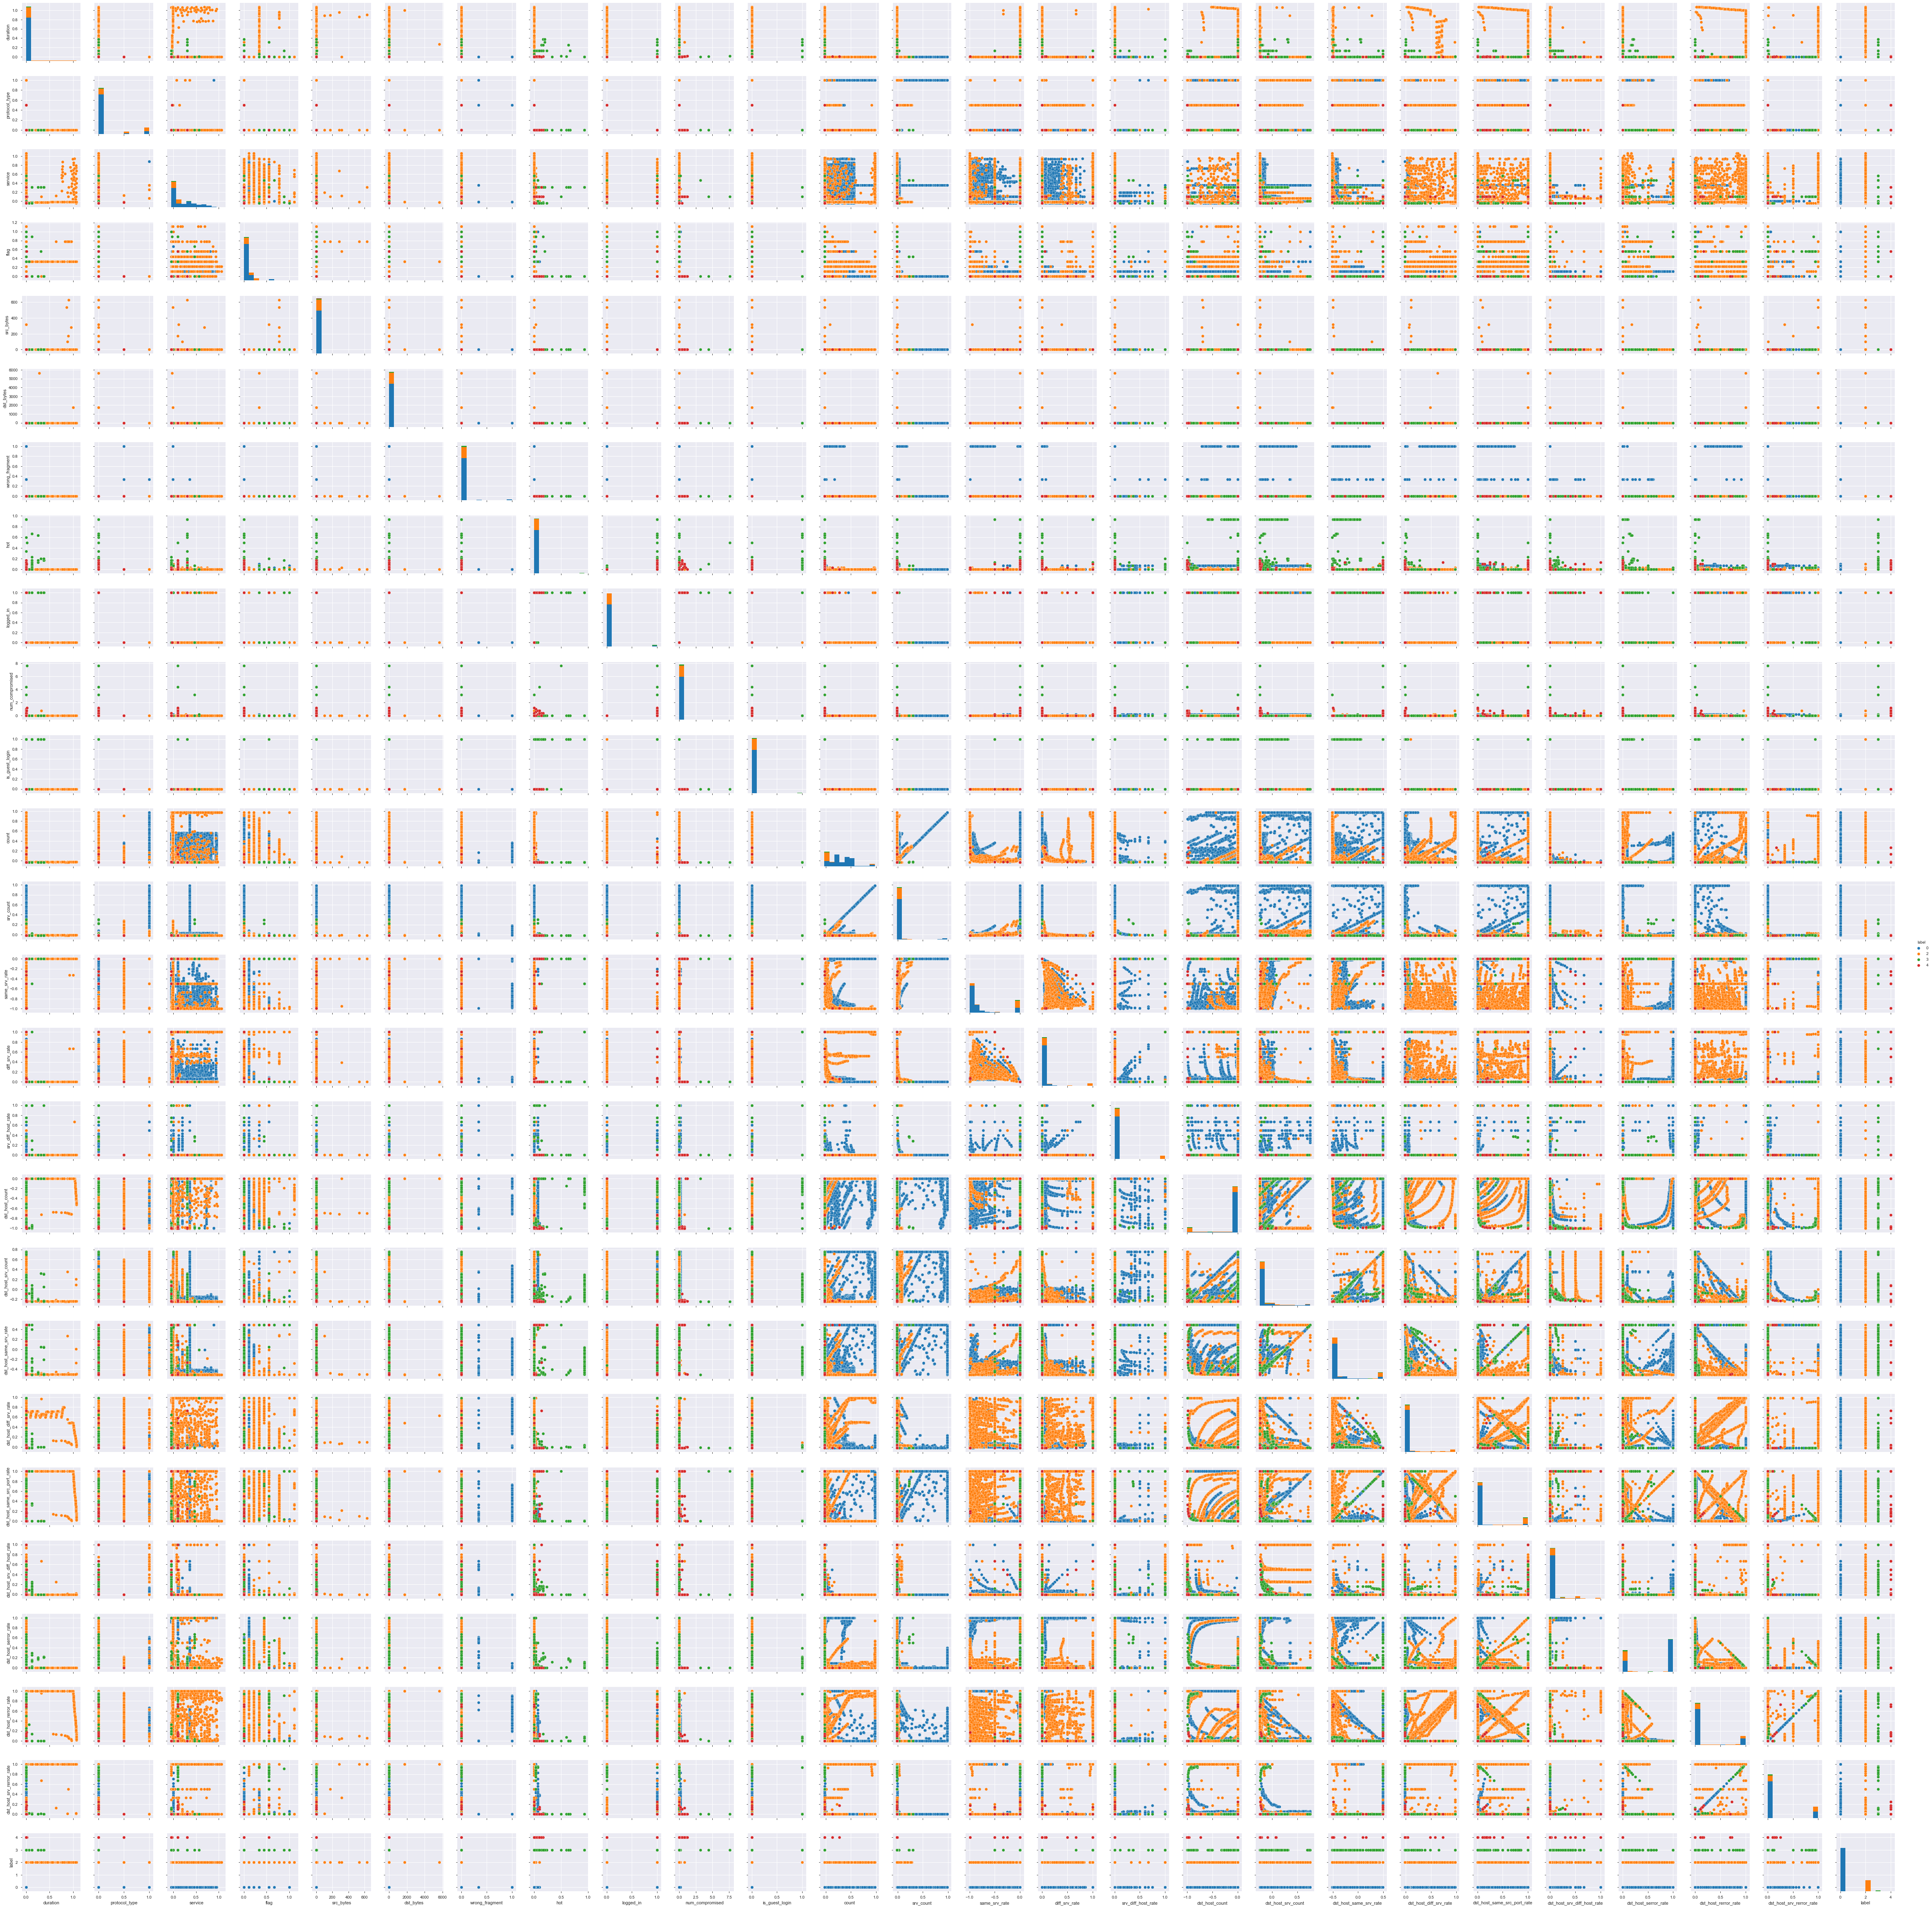

In [23]:
swarm_plot = sns.pairplot(train.query('label != 1'),hue='label')
# fig = swarm_plot.get_figure()
plt.savefig("all.png",dpi = 300)

### <center>DoS</center>

In [22]:
dos_df = x_train.query('label == 0')
print("Number of samples : {}".format(dos_df.shape[0]))

Number of samples : 45927


In [23]:
Q1 = dos_df[data_cols].quantile(0.25)
Q3 = dos_df[data_cols].quantile(0.75)
IQR = Q3 - Q1
# print(IQR)

### <center>Probe</center>

In [6]:
probe_df = x_train.query('label == 2')
print("Number of probe attack samples : {}".format(probe_df.shape[0]))

Number of probe attack samples : 11656


In [7]:
Q1 = probe_df[data_cols].quantile(0.25)
Q3 = probe_df[data_cols].quantile(0.75)
IQR = Q3 - Q1
# print(IQR)

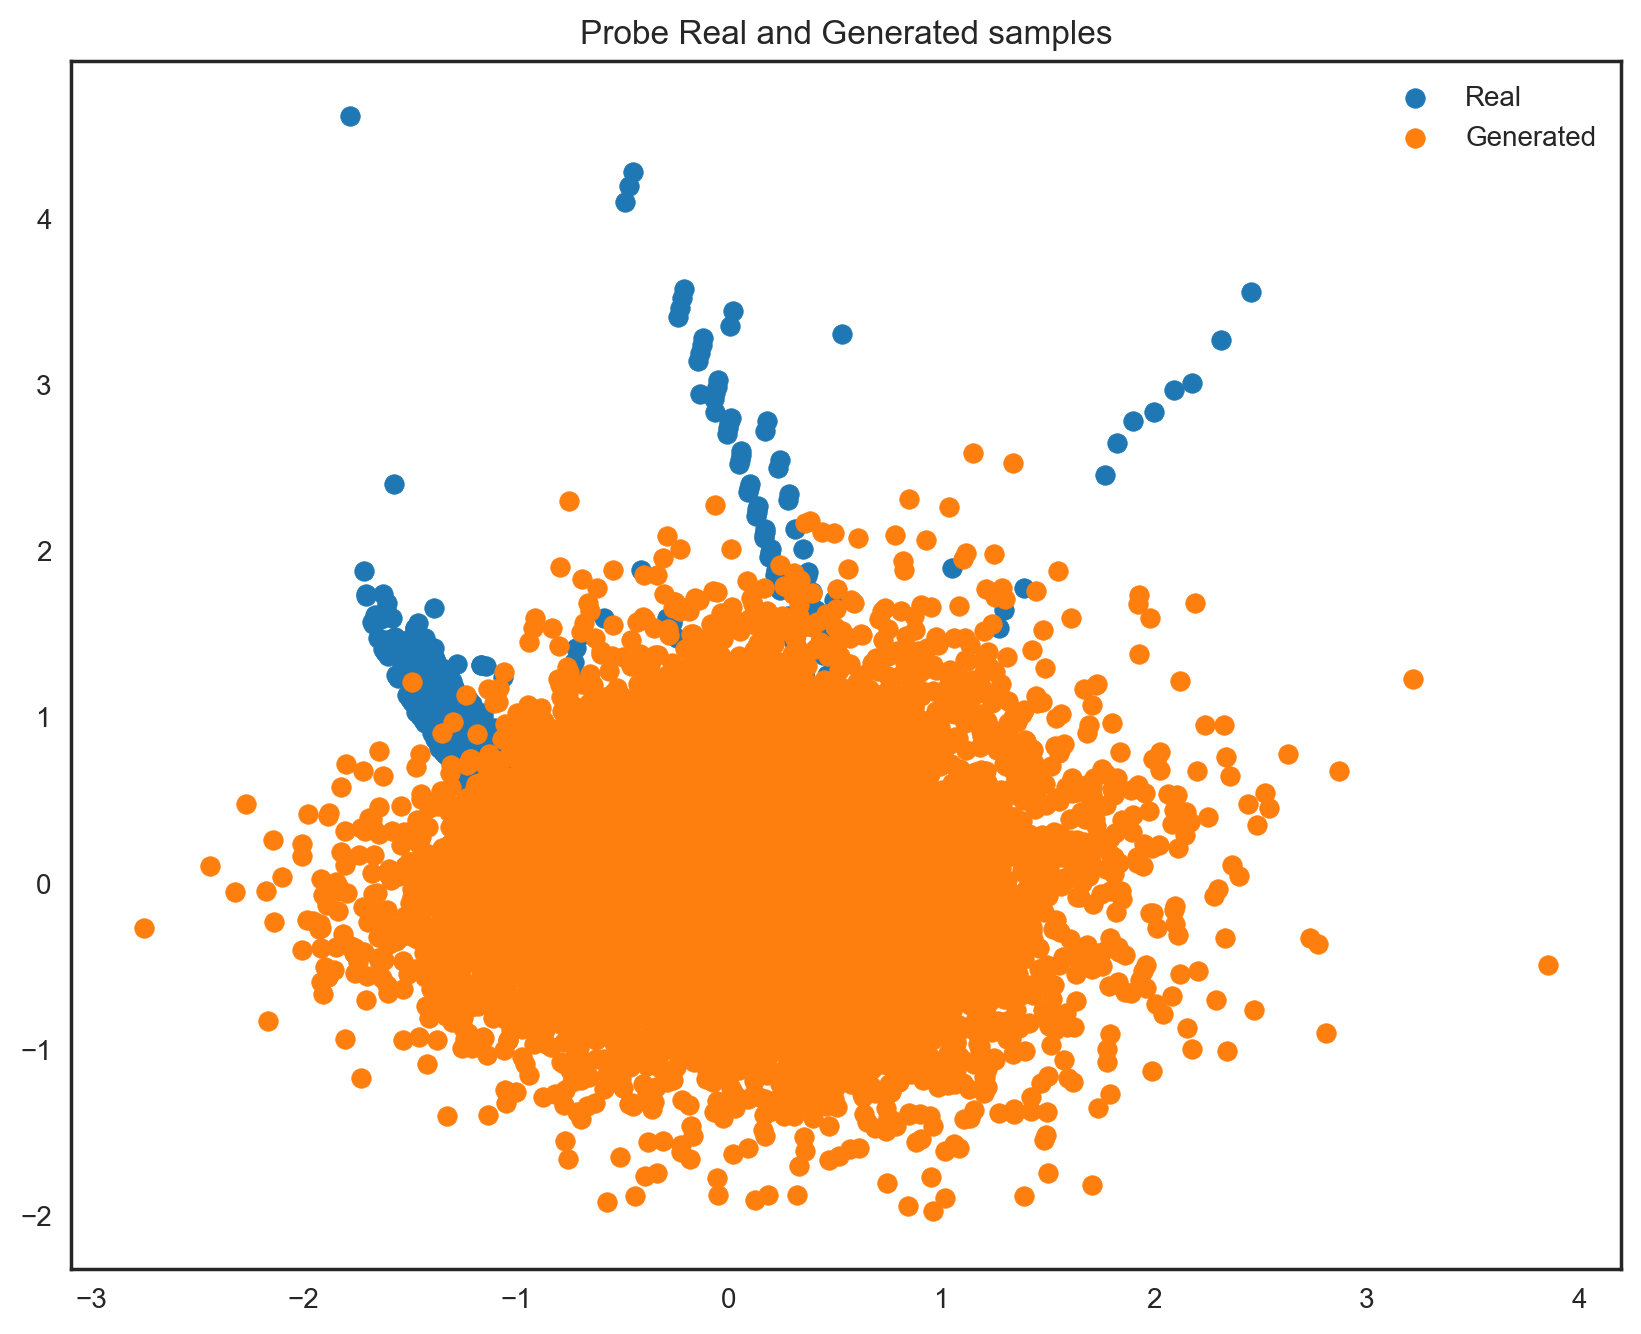

In [21]:
#Plot the difference of fake and real attacks

figure(num=None, figsize=(10, 8), dpi=200, facecolor='w', edgecolor='k')

pca = PCA(n_components=2)
pca.fit(probe_df.drop("label",axis=1))
decomposed_probe_df = pca.transform(probe_df.drop("label",axis=1))

noise = np.random.normal(0, 1, (len(probe_df), 32))
generated_probe = model.predict([noise, probe_df.label.values.reshape(-1,1)])[:,:-1]

gen_decomposed = PCA(n_components=2).fit_transform(generated_probe)
plt.scatter(x=decomposed_probe_df[:,0],y=decomposed_probe_df[:,1],label="Real")
plt.scatter(x=gen_decomposed[:,0],y=gen_decomposed[:,1],label="Generated")
plt.title("Probe Real and Generated samples")
plt.legend()
plt.show()

### <center>R2L</center>

In [9]:
r2l_df = x_train.query('label == 3')
print("Number of R2L samples : {}".format(r2l_df.shape[0]))

Number of R2L samples : 995


In [10]:
Q1 = r2l_df[data_cols].quantile(0.25)
Q3 = r2l_df[data_cols].quantile(0.75)
IQR = Q3 - Q1
# print(IQR)

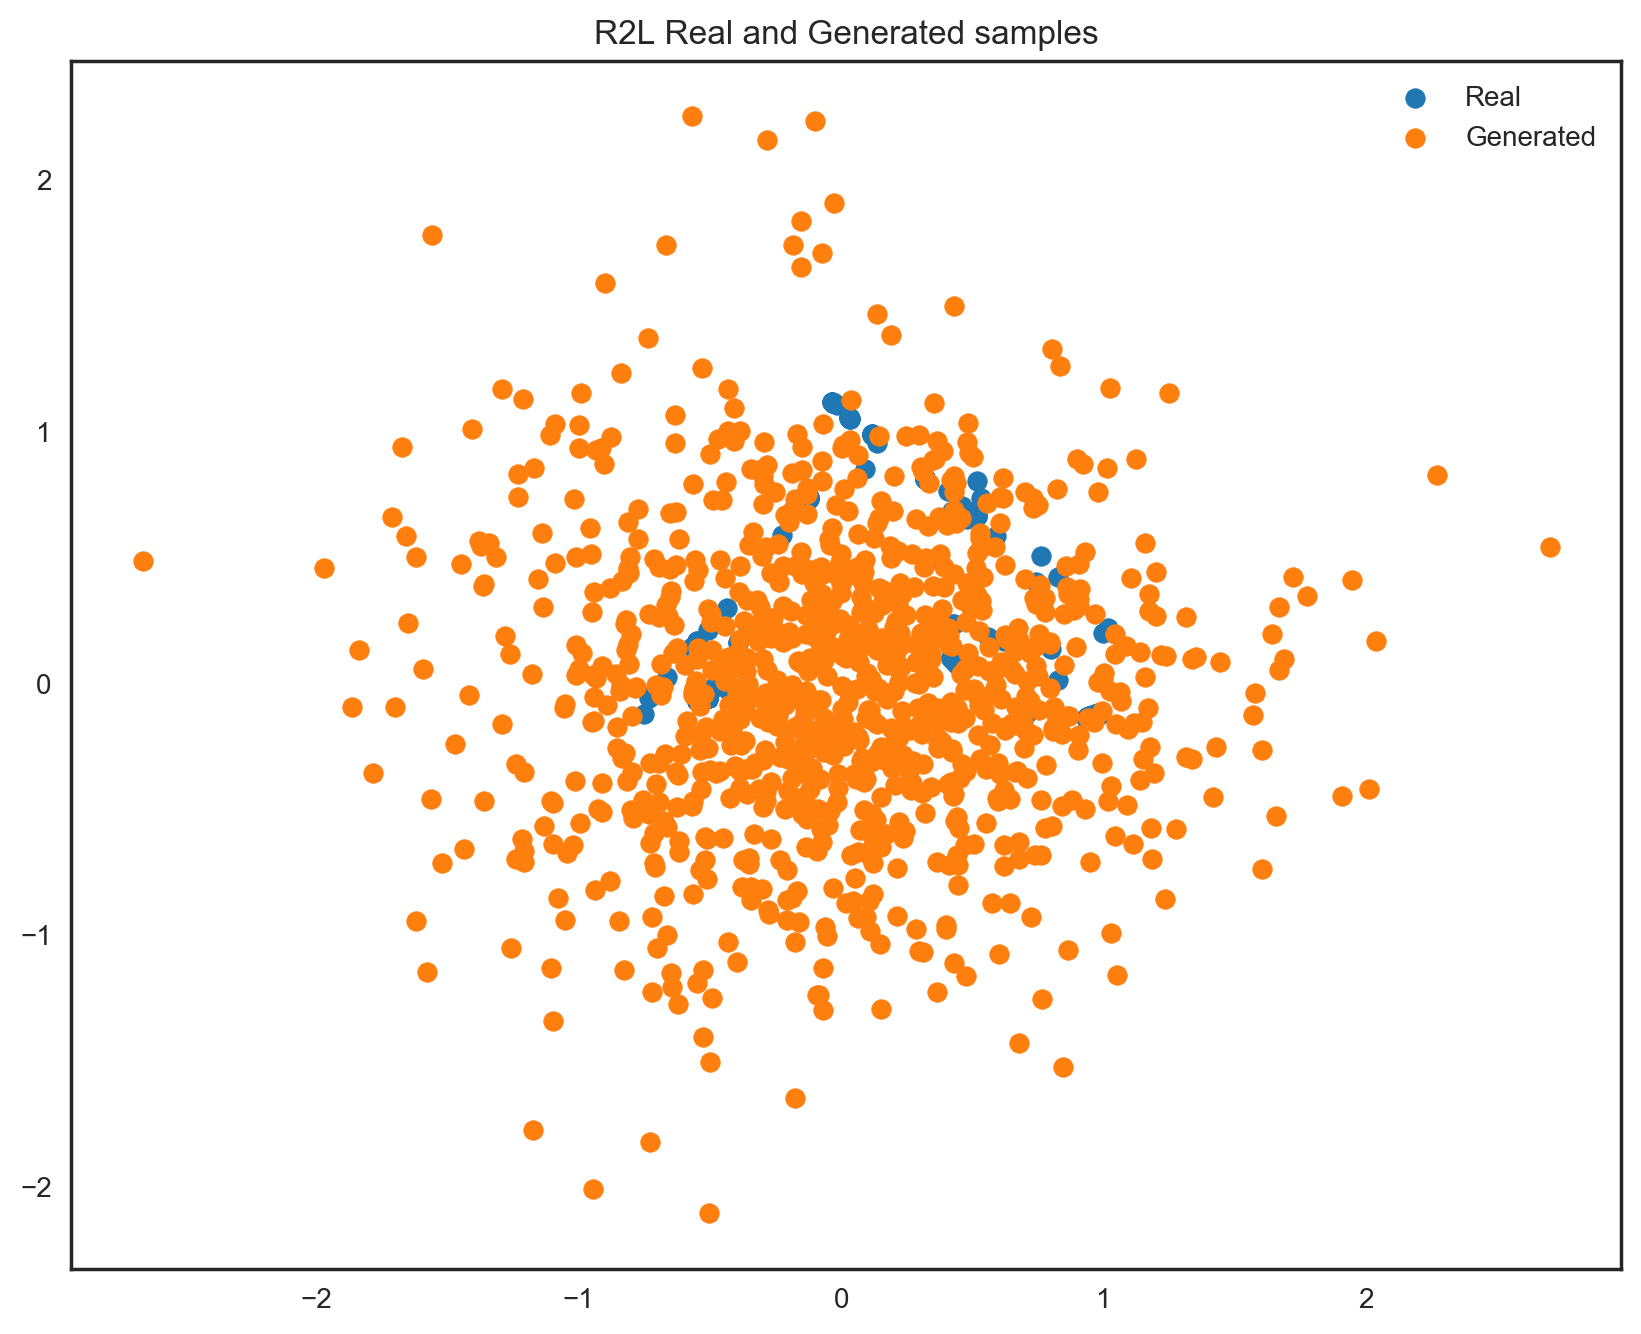

In [11]:
#Plot the difference of fake and real attacks
figure(num=None, figsize=(10, 8), dpi=200, facecolor='w', edgecolor='k')

pca = PCA(n_components=2)
pca.fit(r2l_df.drop("label",axis=1))
decomposed_r2l_df = pca.transform(r2l_df.drop("label",axis=1))

noise = np.random.normal(0, 1, (len(r2l_df), 32))
generated_r2l = model.predict([noise, r2l_df.label.values.reshape(-1,1)])[:,:-1]

gen_decomposed = PCA(n_components=2).fit_transform(generated_r2l)
plt.scatter(x=decomposed_r2l_df[:,0],y=decomposed_r2l_df[:,1],label="Real")
plt.scatter(x=gen_decomposed[:,0],y=gen_decomposed[:,1],label="Generated")
plt.title("R2L Real and Generated samples")
plt.legend()
plt.show()

### <center>U2R</center>

In [12]:
u2r_df = x_train.query('label == 4')
print("# of samples : {}".format(u2r_df.shape[0]))

# of samples : 52


In [16]:
# swarm_plot = sns.pairplot(u2r_df)
# # fig = swarm_plot.get_figure()
# plt.savefig("ur3.png",dpi = 300)

Q1 = u2r_df[data_cols].quantile(0.25)
Q3 = u2r_df[data_cols].quantile(0.75)
IQR = Q3 - Q1
# print(IQR)

mask = ~((train[data_cols] < (Q1 - 1.5 * IQR)) |(train[data_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

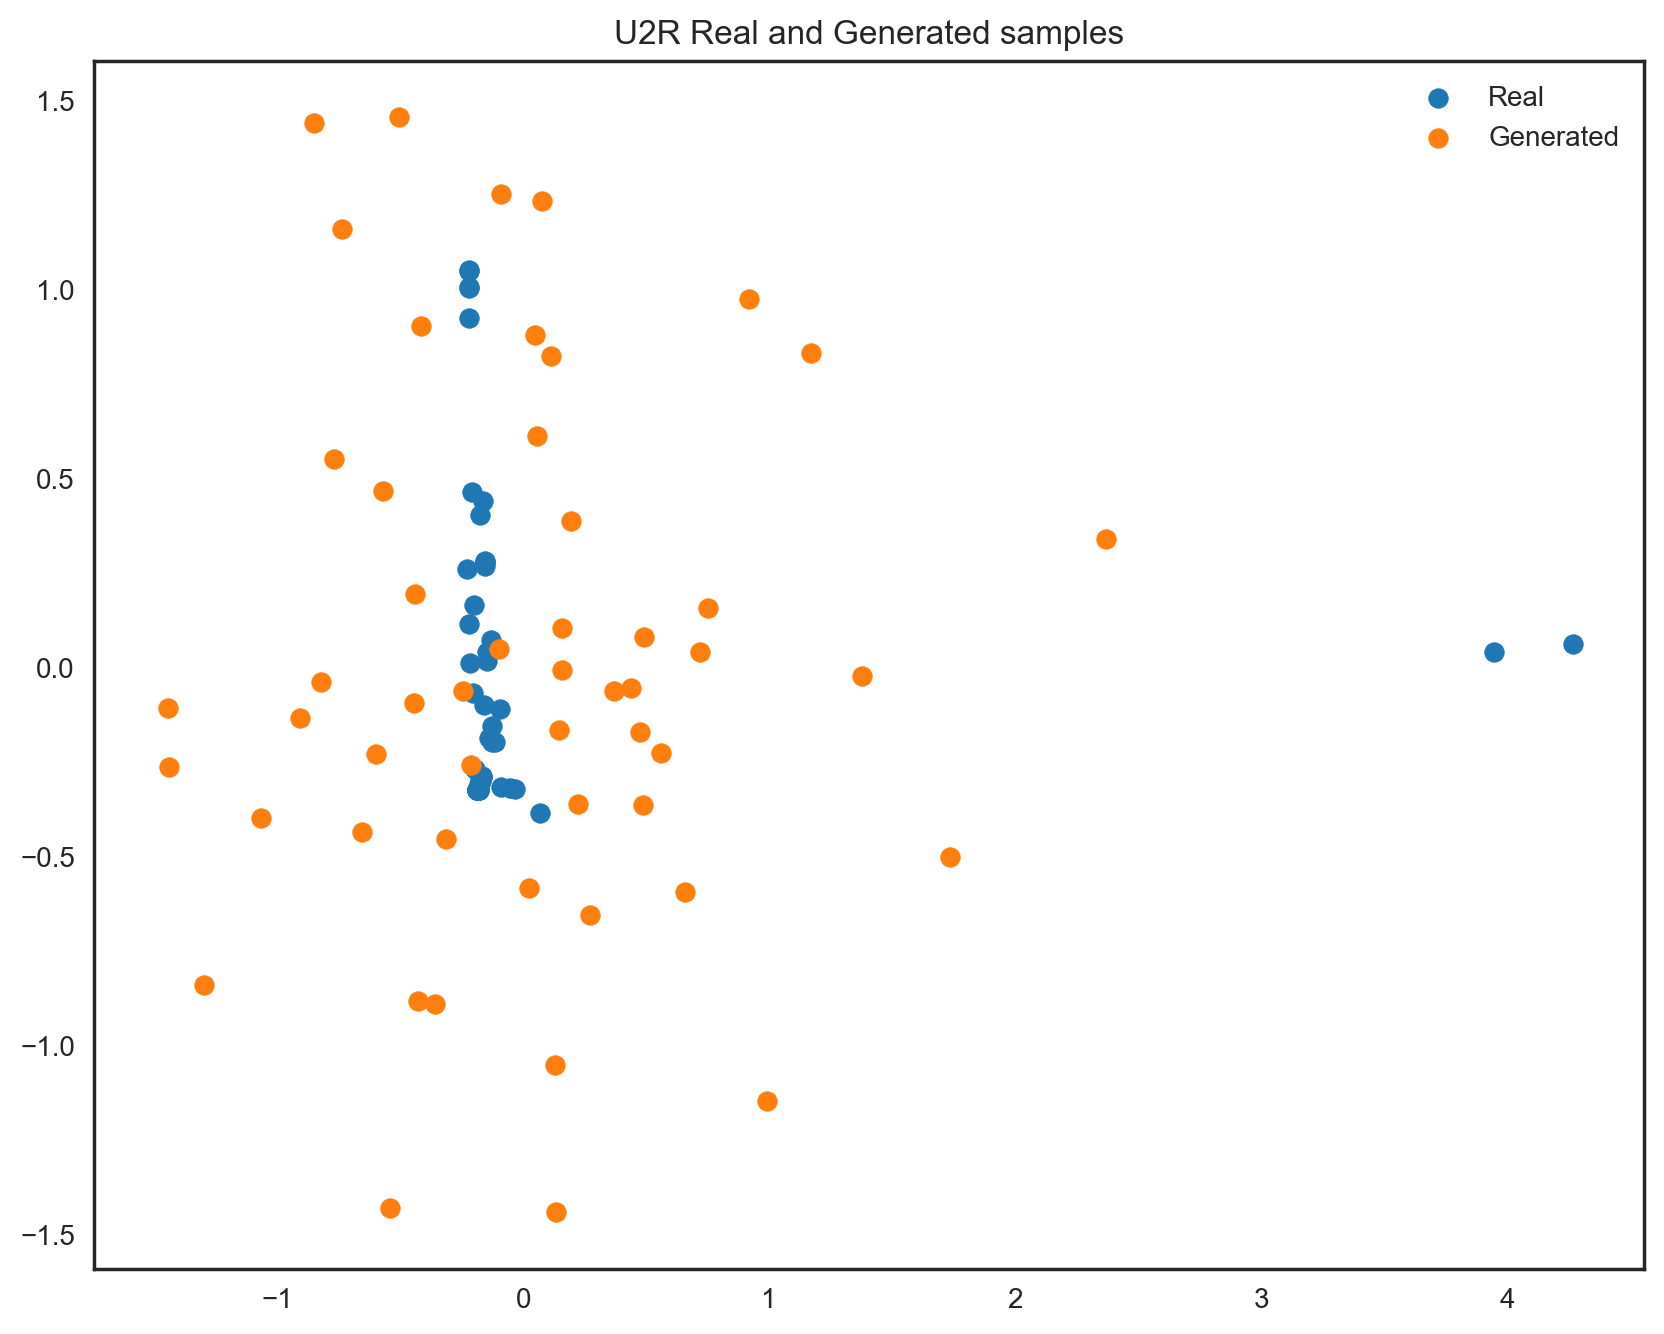

In [19]:
#Plot the difference of fake and real attacks
figure(num=None, figsize=(10, 8), dpi=200, facecolor='w', edgecolor='k')

pca = PCA(n_components=2)
pca.fit(u2r_df.drop("label",axis=1))
decomposed_u2r_df = pca.transform(u2r_df.drop("label",axis=1))

noise = np.random.normal(0, 1, (len(u2r_df), 32))
generated_u2r = model.predict([noise, u2r_df.label.values.reshape(-1,1)])[:,:-1]

gen_decomposed = PCA(n_components=2).fit_transform(generated_u2r)
plt.scatter(x=decomposed_u2r_df[:,0],y=decomposed_u2r_df[:,1],label='Real')
plt.scatter(x=gen_decomposed[:,0],y=gen_decomposed[:,1],label='Generated')
plt.title("U2R Real and Generated samples")
plt.legend()
plt.show()